In [245]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [246]:
## Environment
# Change main system path to be able to run code from src folder
import sys
p = sys.path[0]
# Mac OS
if sys.path[0].endswith('/models'):
    main_path = p[:-len('/models')]
sys.path[0] = main_path

import os, gc
from termcolor import colored
import pandas as pd
from src import config

In [254]:
include_val_loss = True
include_sam = False

In [261]:
if include_val_loss:
    cvloss_files = [each for each in os.listdir(config.MODELS_DIR) if (each.endswith('_cvloss.csv') | 
                                                                    each.endswith('_Vloss.csv'))]
else:
    cvloss_files = [each for each in os.listdir(config.MODELS_DIR) if (each.endswith('_cvloss.csv'))]
    
print(len(cvloss_files))

91


In [262]:
model_summary = pd.DataFrame()
for i in cvloss_files:
    df = pd.read_csv(os.path.join(config.MODELS_DIR, i), index_col='target')
    model_summary = pd.concat([model_summary, df], axis=1)

target_labels_list = model_summary.index.tolist()

model_sum = model_summary.T.copy()
model_sum['overall'] = model_sum.mean(axis=1)

In [263]:
from collections import Counter
cnt = Counter(model_sum.index)
for i in cnt:
    if cnt[i] > 1:
        print(i)

In [264]:
model_sum

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_XGB_opt_trvl_sfm_V,0.010206,0.008943,0.011615,0.019376,0.001745,0.011197,0.020893,0.010903,0.012120,0.005351,0.011235
fts_mra_tempmz_LR_reg_trV,0.324693,0.345395,0.246192,0.418233,0.007415,0.250444,0.448105,0.295080,0.307180,0.090075,0.273281
fts_mra_tempmz_slope_cntpk_spectra_lrcorrmz4_XGB_opt_tr_sfm,0.178948,0.122862,0.207070,0.228826,0.014898,0.140021,0.227845,0.226115,0.202048,0.064383,0.161302
fts_mzstats_XGB_opt_trvlV,0.010753,0.008886,0.013689,0.020340,0.002005,0.013510,0.019990,0.012167,0.012247,0.004644,0.011823
fts_mra_tempmz_slope_cntpk_XGB_opt_trV,0.127873,0.117980,0.220395,0.274195,0.015860,0.149484,0.232659,0.162748,0.239481,0.070921,0.161160
...,...,...,...,...,...,...,...,...,...,...,...
fts_mra_tempmz_XGB_opt_tr,0.196651,0.121020,0.204338,0.226116,0.029273,0.194202,0.259516,0.233179,0.203174,0.078807,0.174628
fts_lr_corr_mz4_XGB_opt_trvl_sfm_V,0.277424,0.300073,0.307314,0.420088,0.158420,0.428448,0.537636,0.315103,0.399383,0.106009,0.324990
ens_0097V,0.009510,0.003081,0.011159,0.017857,0.000939,0.010267,0.016863,0.010903,0.012387,0.004421,0.009739
fts_mra_tempmz_slope_cntpk_XGB_opt_tr_sfm,0.177574,0.114397,0.204482,0.230243,0.014417,0.138799,0.230109,0.221318,0.199734,0.066795,0.159787


In [278]:
FTS_NAME = 'fts_mra_tempmz'
# Get all the models with the above feature(s)
MODELS = [i for i in model_sum.index if (i.endswith('_trV'))]
# Get the selected models from model_sum
ms = model_sum[model_sum.index.isin(MODELS)]
ms = ms[ms.index.isin([i for i in ms.index if not i.startswith('ens_')])].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
ens_0097386_trV,0.130949,0.090931,0.183407,0.283101,0.007415,0.149681,0.230758,0.152138,0.239398,0.065447,0.153322
fts_mra_tempmz_slope_XGB_opt_trV,0.122569,0.093228,0.187465,0.301150,0.010862,0.148234,0.243995,0.152138,0.207704,0.071074,0.153842
fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_trV,0.128634,0.109709,0.205300,0.271730,0.015706,0.150182,0.231591,0.163154,0.228184,0.072633,0.157682
fts_mra_tempmz_slope_cntpk_mzstats_XGB_opt_trV,0.124118,0.123481,0.218257,0.286992,0.011464,0.171297,0.242394,0.164354,0.190179,0.072136,0.160467
fts_mra_tempmz_XGB_opt_trV,0.139595,0.097389,0.199902,0.305084,0.012850,0.156528,0.254760,0.152138,0.215627,0.074808,0.160868
fts_mra_tempmz_slope_cntpk_XGB_opt_trV,0.127873,0.117980,0.220395,0.274195,0.015860,0.149484,0.232659,0.162748,0.239481,0.070921,0.161160
fts_mra_tempmz_slope_cntpk_spectra_mzstats_XGB_opt_trV,0.118407,0.127148,0.205988,0.294713,0.011464,0.182025,0.254104,0.160625,0.190370,0.072538,0.161738
fts_mra_tempmz_slope_cntpk_mzstats_width_XGB_opt_trV,0.148190,0.135031,0.212501,0.299025,0.011668,0.181333,0.236348,0.176169,0.185898,0.071480,0.165764
fts_mra_tempmz_slope_cntpk_topmz_XGB_opt_trV,0.126179,0.177131,0.220413,0.279133,0.015860,0.147273,0.230466,0.155555,0.251343,0.072327,0.167568
fts_mra_tempmz_slope_topmz_XGB_opt_trV,0.125924,0.241453,0.198740,0.310704,0.010900,0.143109,0.252874,0.153830,0.234604,0.071219,0.174336


In [265]:
# TR MODELS
if not include_sam:
    model_sumTR = model_sum[model_sum.index.isin([i for i in model_sum.index if not i.endswith('_sam')])]
model_sumTR = model_sum[model_sum.index.isin([i for i in model_sum.index if ((i.endswith('tr_sfm') | (i.endswith('tr'))))])]
#model_sum = model_sum[model_sum.index.isin([i for i in model_sum.index if not (i.endswith('_trvl_sfm') | i.endswith('_trvl'))])]
model_sumTR.sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_cntpk_topmz_XGB_opt_tr_sfm,0.178072,0.108363,0.203343,0.232681,0.014417,0.138765,0.227415,0.226682,0.198478,0.066320,0.159454
fts_mra_tempmz_slope_cntpk_XGB_opt_tr_sfm,0.177574,0.114397,0.204482,0.230243,0.014417,0.138799,0.230109,0.221318,0.199734,0.066795,0.159787
fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_tr_sfm,0.177500,0.121019,0.201595,0.230331,0.014898,0.142757,0.224134,0.226814,0.195055,0.063815,0.159792
fts_mra_tempmz_slope_cntpk_spectra_lrcorrmz4_XGB_opt_tr_sfm,0.178948,0.122862,0.207070,0.228826,0.014898,0.140021,0.227845,0.226115,0.202048,0.064383,0.161302
fts_mra_tempmz_slope_cntpk_spectra_mzstats_XGB_opt_tr_sfm,0.174869,0.134481,0.204864,0.237288,0.014824,0.179067,0.223556,0.232781,0.189974,0.061162,0.165287
fts_mra_tempmz_slope_cntpk_mzstats_XGB_opt_tr_sfm,0.177365,0.131683,0.208408,0.235024,0.014266,0.177831,0.228368,0.225420,0.198684,0.062797,0.165985
fts_mra_tempmz_slope_XGB_opt_tr_sfm,0.191178,0.108804,0.207700,0.220018,0.025980,0.177872,0.245376,0.233179,0.184260,0.067537,0.166190
fts_mra_tempmz_slope_topmz_XGB_opt_tr_sfm,0.192950,0.102055,0.201494,0.221804,0.026186,0.181108,0.247889,0.234945,0.189138,0.068549,0.166612
fts_mra_tempmz_slope_lrcorrmz4_XGB_opt_tr_sfm,0.192945,0.109450,0.206942,0.221604,0.026107,0.177087,0.247017,0.232926,0.188632,0.067811,0.167052
fts_mra_tempmz_slope_cntpk_mzstats_width_XGB_opt_tr_sfm,0.190268,0.135068,0.206480,0.239400,0.014119,0.180392,0.231509,0.232777,0.189163,0.063508,0.168268


Check if valid loss when trained on TR is the best as well.

In [266]:
# TRVL MODELS
if not include_sam:
    model_sumTRVL = model_sum[model_sum.index.isin([i for i in model_sum.index if not i.endswith('_sam')])]
model_sumTRVL = model_sum[model_sum.index.isin([i for i in model_sum.index if ((i.endswith('trvl_sfm') | (i.endswith('trvl'))))])]
#model_sumTRVL = model_sum[model_sum.index.isin([i for i in model_sum.index if not (i.endswith('_trvl_sfm') | i.endswith('_trvl'))])]
model_sumTRVL.sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

target,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide,overall
fts_mra_tempmz_slope_cntpk_spectra_lrcorrmz4_XGB_opt_trvl_sfm,0.145171,0.084380,0.171349,0.203396,0.012242,0.144082,0.229399,0.183655,0.174359,0.072559,0.142059
fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_trvl_sfm,0.144141,0.084504,0.170871,0.208590,0.012242,0.140860,0.233017,0.184320,0.173801,0.069160,0.142151
fts_mra_tempmz_slope_cntpk_XGB_opt_trvl_sfm,0.151268,0.090636,0.173619,0.205472,0.012233,0.140373,0.232534,0.180160,0.175514,0.071211,0.143302
fts_mra_tempmz_slope_cntpk_topmz_XGB_opt_trvl_sfm,0.152488,0.086394,0.172838,0.209566,0.012233,0.140299,0.229862,0.185025,0.174633,0.071100,0.143444
fts_mra_tempmz_slope_topmz_XGB_opt_trvl_sfm,0.156386,0.080220,0.170276,0.207953,0.014048,0.158083,0.233378,0.185846,0.172586,0.081674,0.146045
fts_mra_tempmz_slope_cntpk_spectra_mzstats_XGB_opt_trvl_sfm,0.153699,0.091696,0.178581,0.208116,0.015204,0.154600,0.235214,0.203397,0.161854,0.068551,0.147091
fts_mra_tempmz_slope_XGB_opt_trvl_sfm,0.158230,0.088487,0.170999,0.208950,0.014049,0.159257,0.234982,0.183037,0.173149,0.081225,0.147236
fts_mra_tempmz_slope_cntpk_mzstats_XGB_opt_trvl_sfm,0.158975,0.093426,0.177115,0.207856,0.015188,0.153058,0.235579,0.201606,0.166451,0.067262,0.147652
fts_mra_tempmz_XGB_opt_trvl_sfm,0.160304,0.089477,0.170999,0.211045,0.014103,0.159757,0.239293,0.186742,0.173557,0.081666,0.148694
fts_mra_tempmz_XGB_opt_trvl,0.160304,0.092998,0.170999,0.211045,0.016176,0.159757,0.239293,0.186742,0.173557,0.081666,0.149254


In [ ]:
FTS_NAME = 'fts_mra_tempmz'
# Get all the models with the above feature(s)
MODELS = [i for i in model_sum.index if (i.startswith(FTS_NAME) & 
                                         (len(i) < (len(FTS_NAME)+14)))]
# Get the selected models from model_sum
model_sum[model_sum.index.isin(MODELS)].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

In [ ]:
FTS_NAME = 'fts_mra_tempmz_cntpk_mratt'
# Get all the models with the above feature(s)
MODELS = [i for i in model_sum.index if (i.startswith(FTS_NAME) & 
                                         (len(i) < (len(FTS_NAME)+14)))]
# Get the selected models from model_sum
model_sum[model_sum.index.isin(MODELS)].sort_values(by='overall')\
             .style.highlight_min(axis=0, 
                                  props='color:darkblue; background-color:lightblue;',
                                  subset=target_labels_list)\
                    .highlight_min(axis=0, 
                                   props='color:white; background-color:red;',
                                   subset=['overall'])

# Confusion Matrix

https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [163]:
from src import training
import numpy as np

In [152]:
valid_labels = pd.read_csv(config.DATA_DIR + 'val_labels.csv')

In [236]:
LABEL = 'basalt'
MODEL_NAME = 'fts_mra_tempmz_slope_cntpk_spectra_XGB_opt_trvl_sfm.csv'

In [237]:
MODEL_SUB = pd.read_csv(os.path.join(config.MODELS_DIR, MODEL_NAME))
MODEL_SUB = MODEL_SUB.iloc[:valid_labels.shape[0]][[LABEL]].copy()
MODEL_SUB[LABEL+'_c'] = np.where(MODEL_SUB[LABEL] > 0.5,1,0)
y_preds_class = MODEL_SUB[LABEL+'_c'].values
y_actual_class = valid_labels[LABEL].values
dt = pd.concat([pd.Series(y_preds_class), pd.Series(y_actual_class)], axis=1)
dt.columns = ['prediction','actual']

In [238]:
c = pd.crosstab(dt.actual, dt.prediction)
c

prediction,0,1
actual,,
0,262,0
1,0,31


In [229]:
c = pd.crosstab(dt.actual, dt.prediction)
c

prediction,0,1
actual,,
0,279,1
1,0,13


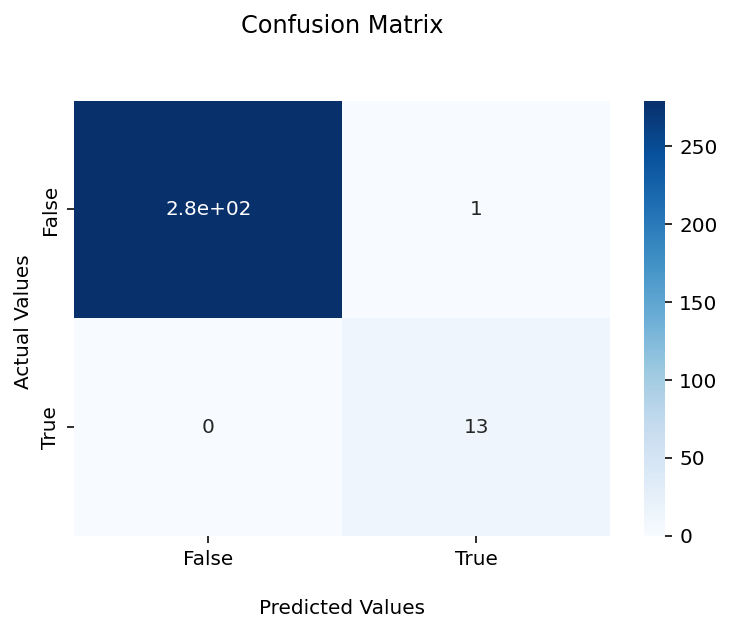

array([[279,   1],
       [  0,  13]])

In [195]:
training.plot_conf_matrix(y_preds_class,y_actual_class)